# KDE

In [9]:

import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [10]:
np.random.seed(0)
X = np.concatenate((np.random.normal(0, 1, 500), np.random.normal(4, 0.5, 500)))[:, np.newaxis]
X_plot = np.linspace(-5, 6, 1000)[:, np.newaxis]

-5185.59018074158


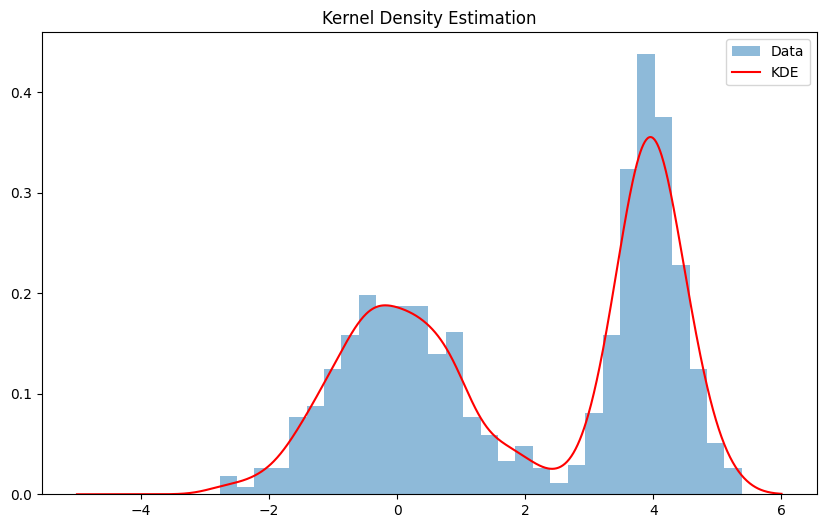

In [13]:
kde = KernelDensity(bandwidth=.3)
kde.fit(X)
log_dens = kde.score_samples(X_plot)
print(kde.score(X_plot))

plt.figure(figsize=(10, 6))
plt.hist(X, bins=30, density=True, alpha=0.5, label="Data")
plt.plot(X_plot, np.exp(log_dens), color='red', label="KDE")
plt.title("Kernel Density Estimation")
plt.legend()
plt.show()

-39809.92237015193


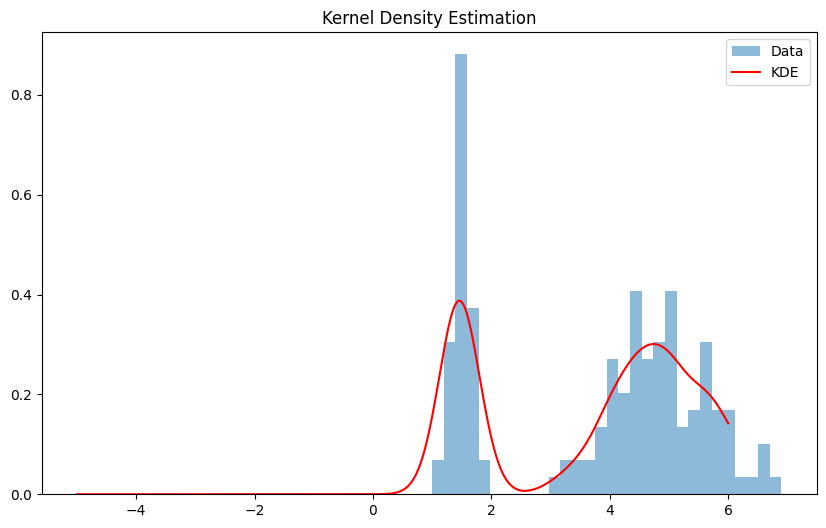

In [15]:
from myModels import KDE
kde = KDE(bandwidth=.3)
kde.fit(X)
log_dens = kde.score_samples(X_plot)
print(kde.score(X_plot))

plt.figure(figsize=(10, 6))
plt.hist(X, bins=30, density=True, alpha=0.5, label="Data")
plt.plot(X_plot, np.exp(log_dens), color='red', label="KDE")
plt.title("Kernel Density Estimation")
plt.legend()
plt.show()

## Реальные данные

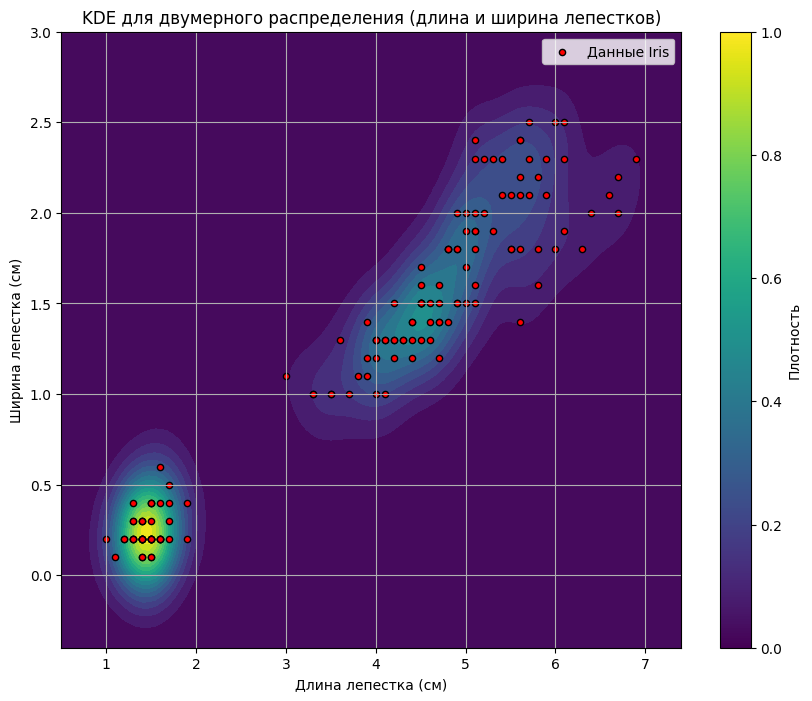

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [2,3]] 

kde = KDE(kernel='gaussian', bandwidth=0.2).fit(X)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

log_dens = kde.score_samples(grid_points)
dens = np.exp(log_dens).reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, dens, cmap='viridis', levels=20)
plt.scatter(X[:, 0], X[:, 1], c='red', s=20, edgecolor='k', label='Данные Iris')
plt.colorbar(label='Плотность')
plt.title('KDE для двумерного распределения (длина и ширина лепестков)')
plt.xlabel('Длина лепестка (см)')
plt.ylabel('Ширина лепестка (см)')
plt.legend()
plt.grid(True)
plt.show()

# STL

In [46]:
n = 1000
t = np.linspace(0, 16 * np.pi, n)
seasonal = 5 * np.sin(t)
trend = t
noise = np.random.normal(0, 1, n)
data = seasonal + trend + noise

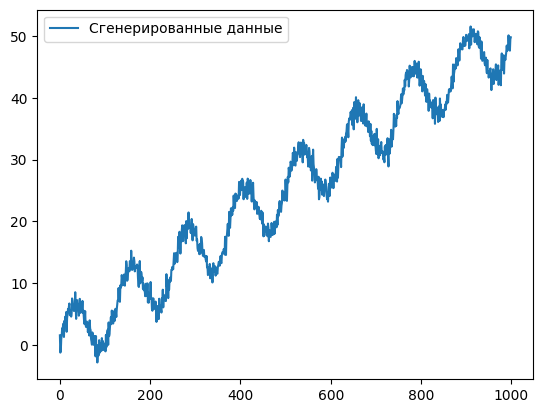

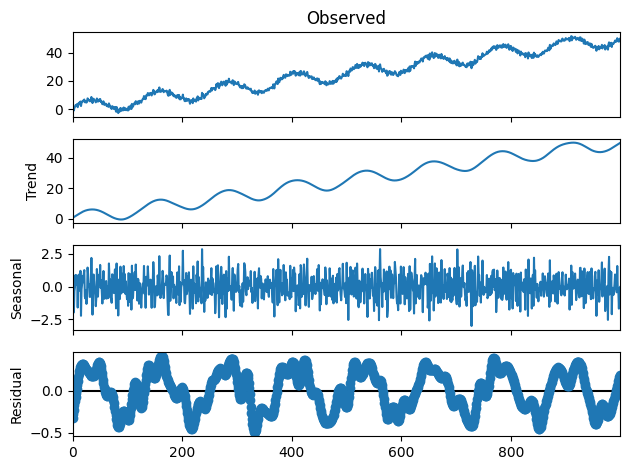

In [47]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

stl = STL(data, period=12, seasonal=3, robust = True)
result = stl.fit(inner_iter=20, outer_iter=10)
plt.plot(range(n), data, label='Сгенерированные данные')
plt.legend()
plt.show()
result.plot()
plt.show()

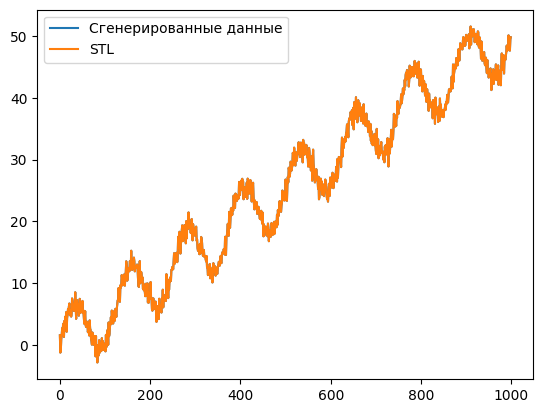

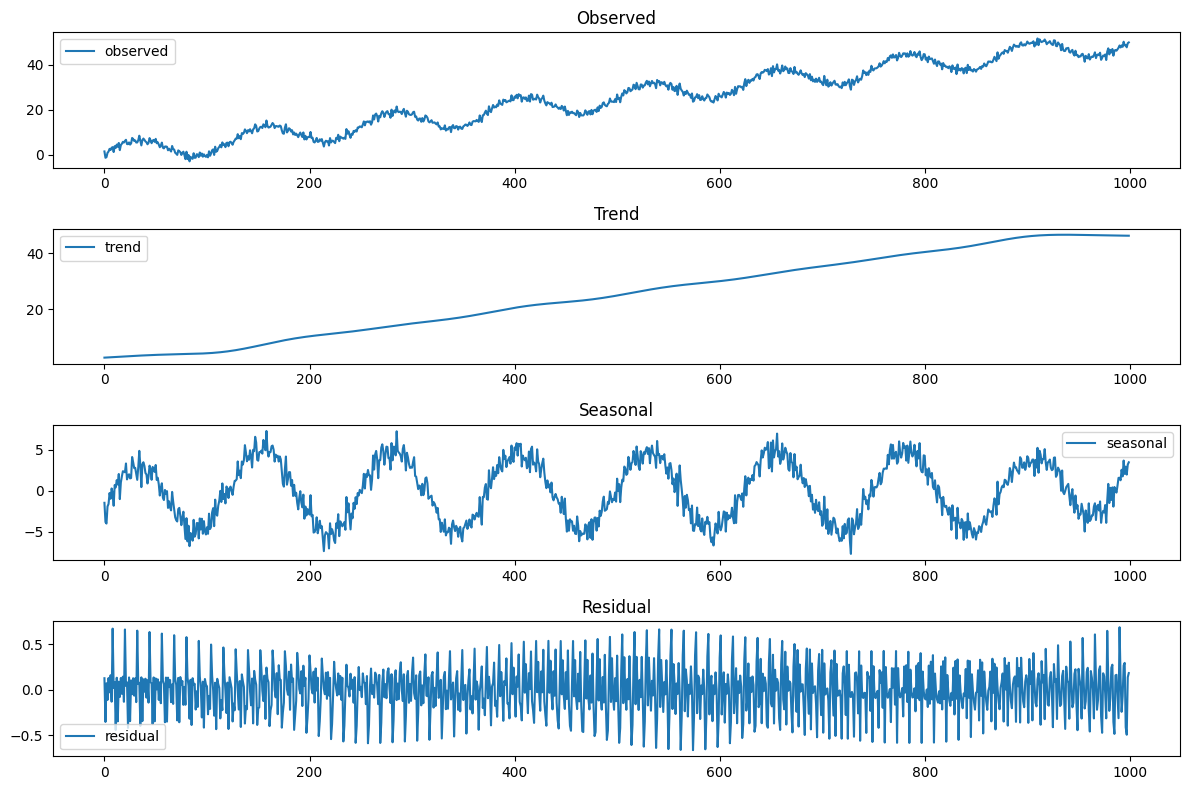

In [48]:
from myModels import STL
import matplotlib.pyplot as plt

stl = STL(period=12, seasonal=3)
result = stl.fit(data, inner_iter=20, outer_iter=10)
plt.plot(range(n), data, label='Сгенерированные данные')
plt.plot(range(n), result.R + result.S + result.T, label='STL')
plt.legend()
plt.show()
result.plot()
plt.show()

## Реальные данные

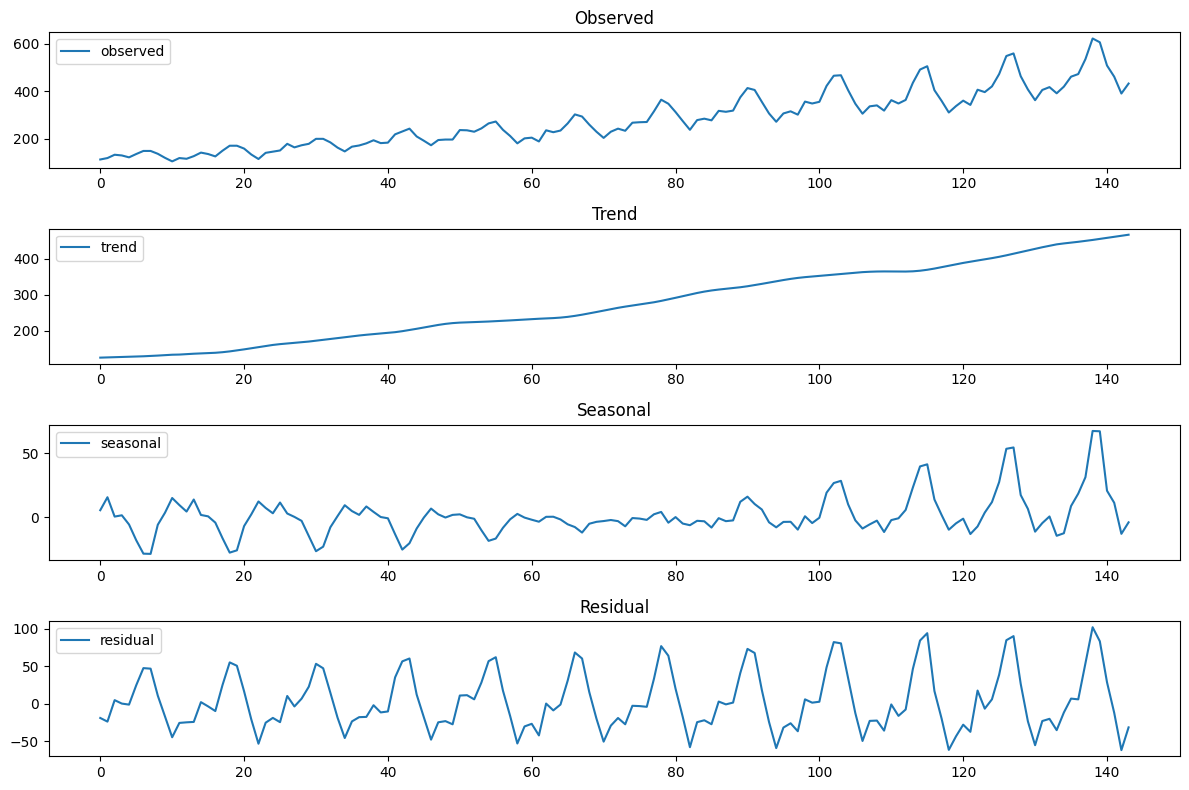

In [ ]:
import pandas as pd
from statsmodels.datasets import get_rdataset

data = get_rdataset("AirPassengers", "datasets").data

data["Month"] = pd.to_datetime(data["time"])
data.set_index("Month", inplace=True)
Y = data["value"].values

stl = STL(period=12, seasonal=7)
result = stl.fit(Y, inner_iter=6, outer_iter=3)
result.plot()
plt.show()

# AdaBoost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.Paired)
    ax.set_title(title)
    
def generate_circular_data(n_samples=500, noise=0.1):
    np.random.seed(42)
    r = np.random.uniform(0, 1, n_samples)
    theta = np.random.uniform(0, 2 * np.pi, n_samples)

    X = np.zeros((n_samples, 2))
    X[:, 0] = r * np.cos(theta)
    X[:, 1] = r * np.sin(theta)

    y = (r > 0.7)  # внешний круг — класс 1, внутренний — класс 0
    X += np.random.normal(0, noise, X.shape)

    return X, y.astype(int)

In [23]:
X, y = generate_circular_data(n_samples=1000, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

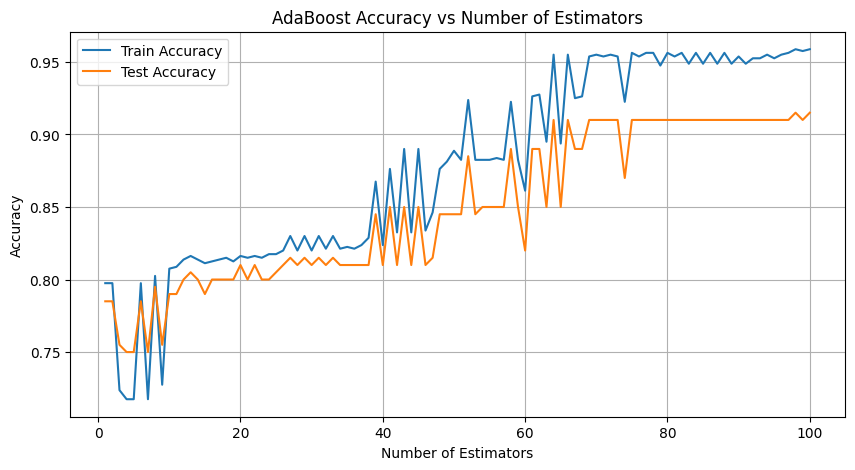

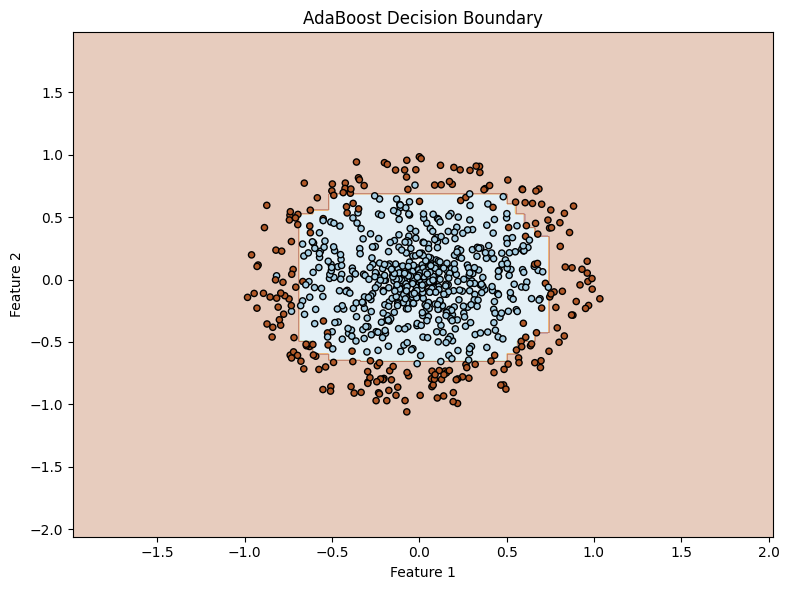

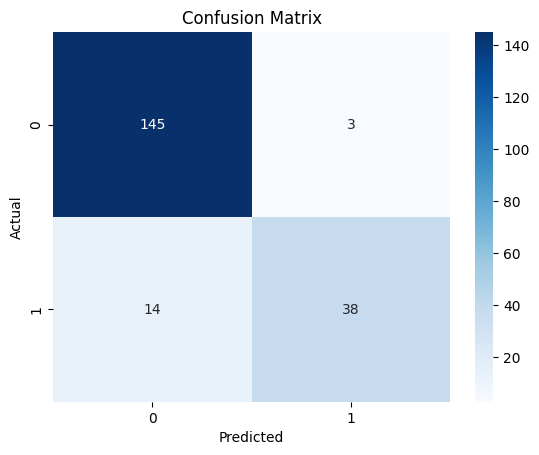

In [24]:
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=base_estimator,
                           learning_rate=0.5,
                           algorithm="deprecated",
                           random_state=42)

train_scores = []
test_scores = []

for i in range(1, 101):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), train_scores, label='Train Accuracy')
plt.plot(range(1, 101), test_scores, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(model, X_train, y_train, ax, "AdaBoost Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

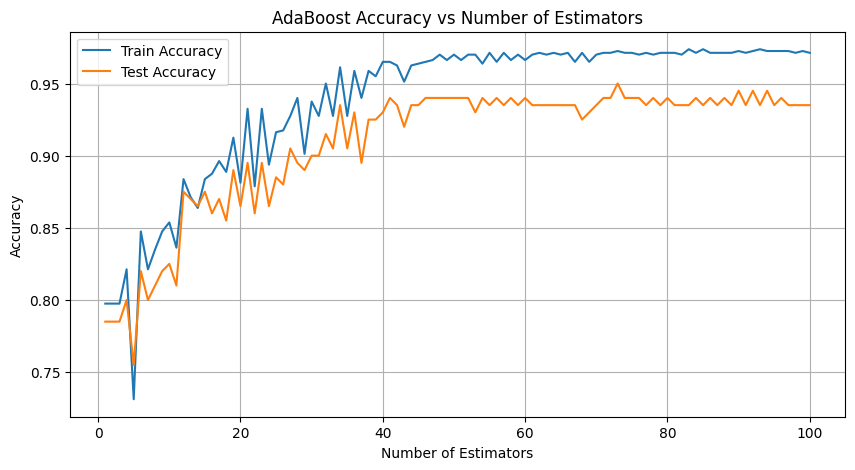

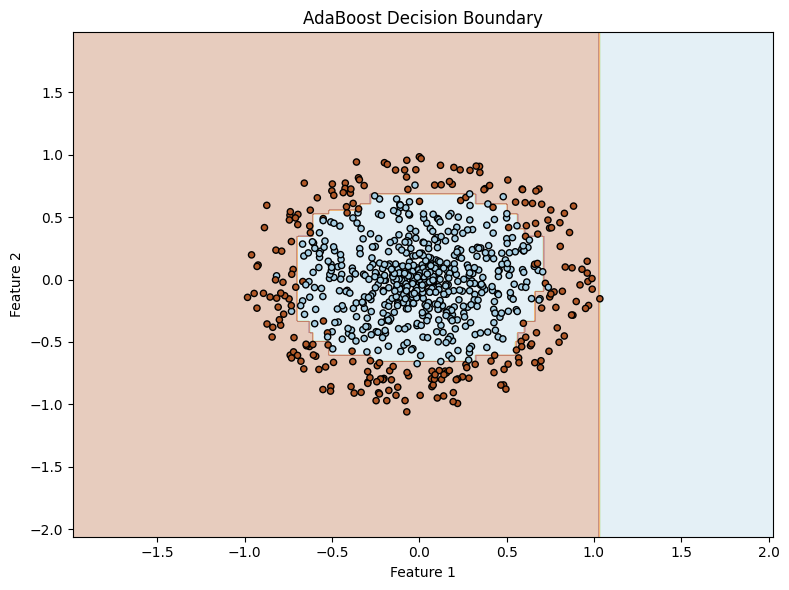

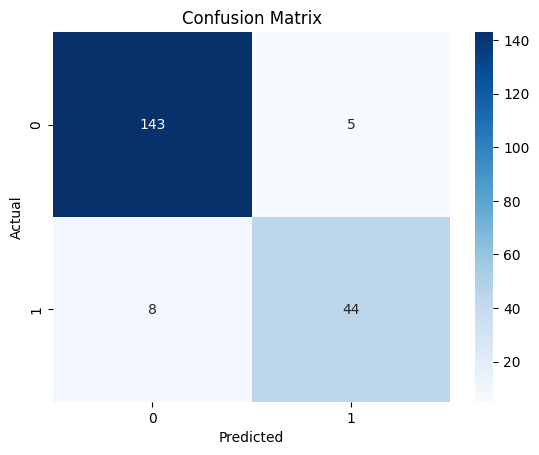

In [25]:
from myModels import AdaBoost
model = AdaBoost()

train_scores = []
test_scores = []

for i in range(1, 101):
    model = AdaBoost(n_estimators=i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_scores.append(accuracy_score(y_train, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), train_scores, label='Train Accuracy')
plt.plot(range(1, 101), test_scores, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(model, X_train, y_train, ax, "AdaBoost Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Реальные данные

Точность модели: 0.92


/tmp/ipykernel_43604/2429221453.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[correct, 0][y[correct] == 0], X[correct, 1][y[correct] == 0], X[correct, 2][y[correct] == 0],
/tmp/ipykernel_43604/2429221453.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[correct, 0][y[correct] == 1], X[correct, 1][y[correct] == 1], X[correct, 2][y[correct] == 1],


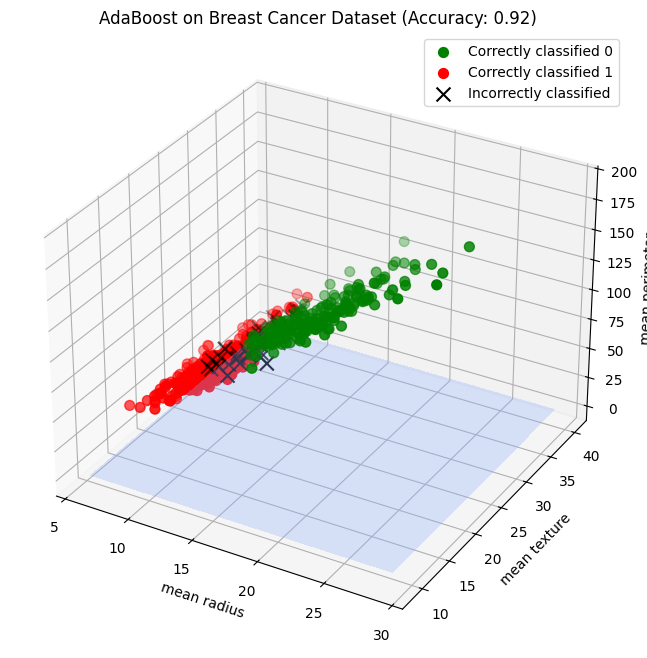

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data[:, [0, 1, 2]] 
y = data.target 

ada = AdaBoost(n_estimators=50)
ada.fit(X, y)

y_pred = ada.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Точность модели: {accuracy:.2f}")

correct = y_pred == y
incorrect = ~correct

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = ada.predict(grid_points)
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[correct, 0][y[correct] == 0], X[correct, 1][y[correct] == 0], X[correct, 2][y[correct] == 0],
           c='green', cmap='coolwarm', 
           s=50, marker='o', label='Correctly classified 0')

ax.scatter(X[correct, 0][y[correct] == 1], X[correct, 1][y[correct] == 1], X[correct, 2][y[correct] == 1],
           c='red', cmap='coolwarm', 
           s=50, marker='o', label='Correctly classified 1')

ax.scatter(X[incorrect, 0], X[incorrect, 1], X[incorrect, 2], c='black', 
           s=100, marker='x', label='Incorrectly classified')

ax.contourf(xx[:, :, 0], yy[:, :, 0], Z[:, :, 0], alpha=0.3, cmap='coolwarm')

ax.set_xlabel(data.feature_names[0]) 
ax.set_ylabel(data.feature_names[1])
ax.set_zlabel(data.feature_names[2]) 
ax.set_title(f'AdaBoost on Breast Cancer Dataset (Accuracy: {accuracy:.2f})')


ax.legend()
plt.show()

# Gradient Boosting

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
np.random.seed(42)
X = 10 * np.random.rand(500, 1)
y = np.sin(X).ravel() + 0.5 * X.ravel() + 0.1 * (X**2).ravel() + np.cos(0.5 * X).ravel()
y += np.random.randn(500) * 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

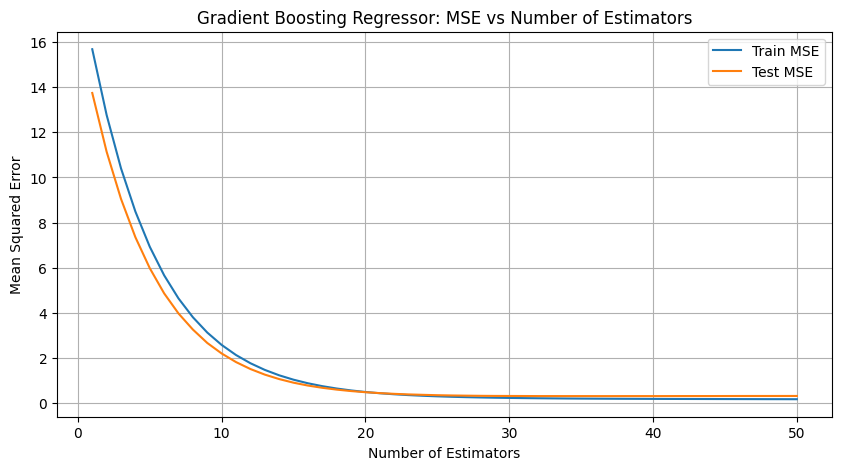

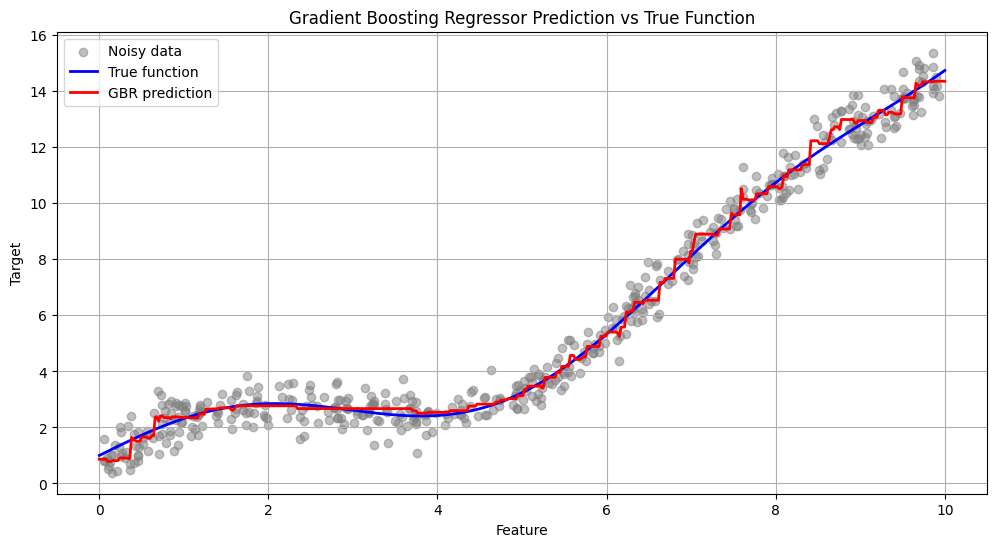

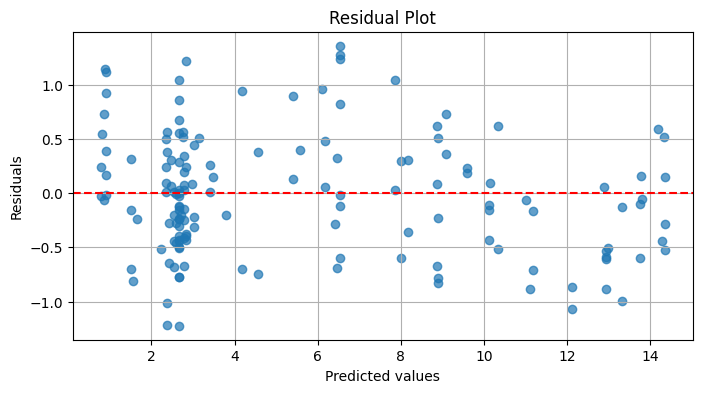

In [37]:
train_errors = []
test_errors = []

for i in range(1, 51):
    model = GradientBoostingRegressor(n_estimators=i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), train_errors, label='Train MSE')
plt.plot(range(1, 51), test_errors, label='Test MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting Regressor: MSE vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

x_plot = np.linspace(0, 10, 500).reshape(-1, 1)
y_true_plot = np.sin(x_plot).ravel() + 0.5 * x_plot.ravel() + 0.1 * (x_plot**2).ravel() + np.cos(0.5 * x_plot).ravel()
y_plot_pred = model.predict(x_plot)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Noisy data')
plt.plot(x_plot, y_true_plot, color='blue', lw=2, label='True function')
plt.plot(x_plot, y_plot_pred, color='red', lw=2, label='GBR prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Gradient Boosting Regressor Prediction vs True Function')
plt.legend()
plt.grid(True)
plt.show()

y_test_pred = model.predict(X_test)
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 4))
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

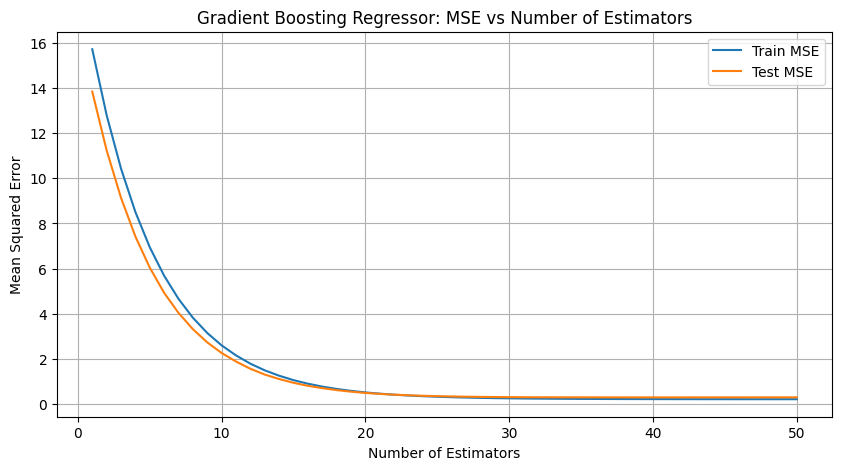

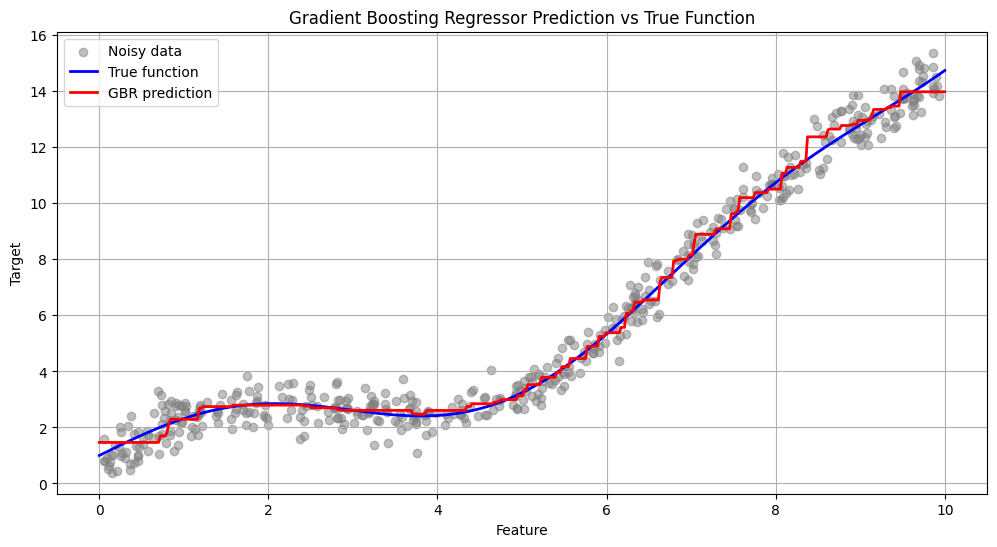

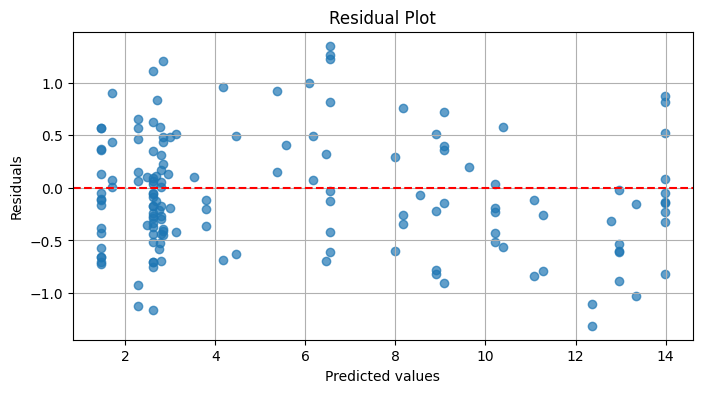

In [38]:
from myModels import GradientBoosting
train_errors = []
test_errors = []

for i in range(1, 51):
    model = GradientBoosting(n_estimators=i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), train_errors, label='Train MSE')
plt.plot(range(1, 51), test_errors, label='Test MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting Regressor: MSE vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

x_plot = np.linspace(0, 10, 500).reshape(-1, 1)
y_true_plot = np.sin(x_plot).ravel() + 0.5 * x_plot.ravel() + 0.1 * (x_plot**2).ravel() + np.cos(0.5 * x_plot).ravel()
y_plot_pred = model.predict(x_plot)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label='Noisy data')
plt.plot(x_plot, y_true_plot, color='blue', lw=2, label='True function')
plt.plot(x_plot, y_plot_pred, color='red', lw=2, label='GBR prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Gradient Boosting Regressor Prediction vs True Function')
plt.legend()
plt.grid(True)
plt.show()

y_test_pred = model.predict(X_test)
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 4))
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

## Реальные данные

In [47]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X = data.data[:1000]
y = data.target[:1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ada = GradientBoosting(n_estimators=50)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Средняя абсолютная ошибка (MAE): {mse:.2f} сотен тысяч долларов")

Средняя абсолютная ошибка (MAE): 0.18 сотен тысяч долларов


# Radial basis kernel regression

In [1]:
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

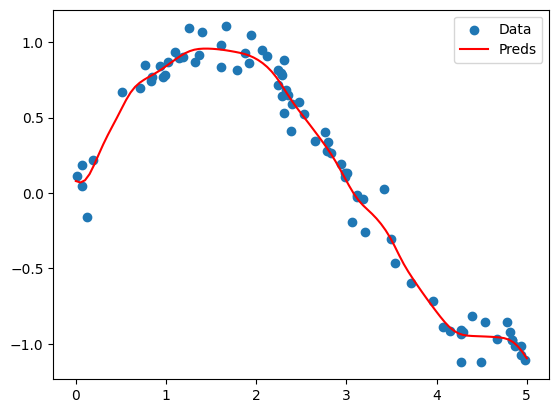

In [3]:
model = KernelReg(y, X, var_type='c')  # 'c' — непрерывная переменная
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred, _ = model.fit(X_test)

plt.scatter(X, y, label='Data')
plt.plot(X_test, y_pred, color='red', label='Preds')
plt.legend()
plt.show()

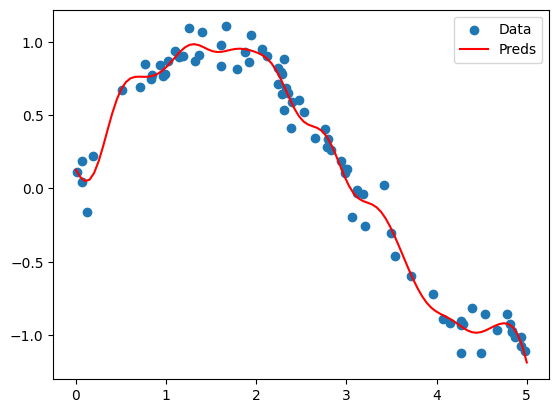

In [4]:
from myModels import  RBFLinearRegression

model = RBFLinearRegression()
model.fit(X, y)

X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

plt.scatter(X, y, label='Data')
plt.plot(X_test, y_pred, color='red', label='Preds')
plt.legend()
plt.show()

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 330
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            303 non-null    float64
 1   X3 distance to the nearest MRT station  303 non-null    float64
 2   X4 number of convenience stores         303 non-null    float64
 3   X5 latitude                             303 non-null    float64
 4   X6 longitude                            303 non-null    float64
 5   Y house price of unit area              303 non-null    float64
dtypes: float64(6)
memory usage: 16.6 KB


## Реальные данные

In [ ]:
import os

data_path = "/home/victor/Datasets/linear-regression-competition-2025/"
df_train = pd.read_csv(
    os.path.join(data_path, "prices_train.csv")).drop(
        columns=['Unnamed: 0', 'X1 transaction date']).dropna()
    
X_train, X_test, y_train, y_test = train_test_split(
    np.array(df_train.drop(columns=['Y house price of unit area'])),
    np.array(df_train['Y house price of unit area']))



model = RBFLinearRegression(lambda_=.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mean_squared_error(y_pred, y_test)

961.1633759614231